In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
rbs = pd.read_csv('../Capstone_csv_file/rbs_td_salary_18-19')

In [3]:
rbs.dtypes

NAME        object
TD           int64
TD_rank    float64
salary       int64
dtype: object

In [4]:
rbs.head()

,NAME,TD,TD_rank,salary
0,Todd Gurley,17,1.0,14375000
1,Alvin Kamara,14,2.0,964443
2,Derrick Henry,12,3.5,1351982
3,Saquon Barkley,11,5.0,7798688
4,Melvin Gordon,10,6.0,2667443


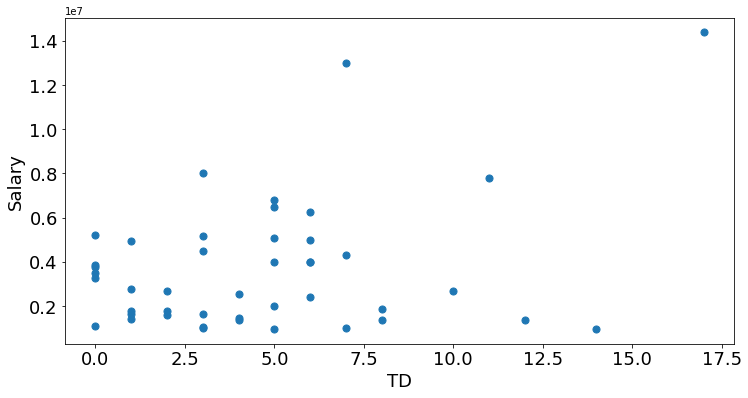

In [5]:
ax = rbs.plot(kind="scatter", x = 'TD',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TD', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(rbs.loc[:, ['TD', 'salary']])

In [7]:
X.mean(axis = 0)

array([4.03717464e-17, 2.01858732e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 1.36750348, -0.73464401],
       [-0.90771666,  0.34745716],
       [ 1.93268555,  3.43833696],
       [-0.52911713, -0.68692392],
       [ 0.41499383,  0.49044167]])

In [11]:
km.predict(X)

array([2, 0, 0, 4, 0, 0, 0, 2, 0, 4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3,
       3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1],
      dtype=int32)

In [12]:
rbs['clusters'] = km.labels_
rbs.head()

,NAME,TD,TD_rank,salary,clusters
0,Todd Gurley,17,1.0,14375000,2
1,Alvin Kamara,14,2.0,964443,0
2,Derrick Henry,12,3.5,1351982,0
3,Saquon Barkley,11,5.0,7798688,4
4,Melvin Gordon,10,6.0,2667443,0


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[9.83333333e+00, 1.53453100e+06],
       [1.11111111e+00, 4.68593333e+06],
       [1.20000000e+01, 1.36875000e+07],
       [2.56250000e+00, 1.67350619e+06],
       [6.18181818e+00, 5.10234700e+06]])

In [14]:
rbs.groupby('clusters')[['TD', 'salary']].mean()

,TD,salary
clusters,,
0,9.833333,1.534531e+06
1,1.111111,4.685933e+06
2,12.000000,1.368750e+07
3,2.562500,1.673506e+06
4,6.181818,5.102347e+06


In [15]:
centroids = rbs.groupby('clusters')[['TD', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

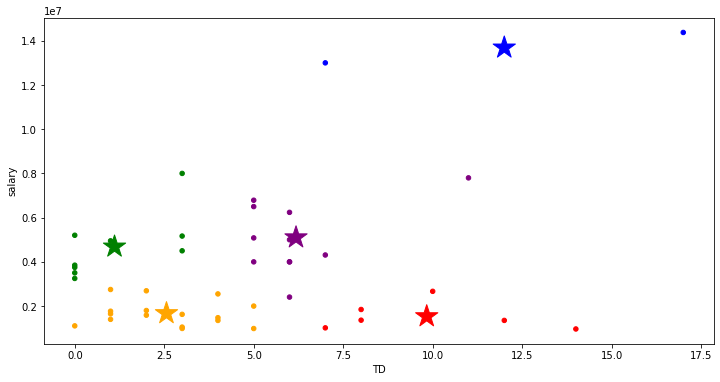

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
rbs['color'] = rbs['clusters'].map(lambda p: colors[p])

ax = rbs.plot(    
    kind = 'scatter', 
    x = 'TD', y = 'salary',
    figsize = (12,6),
    c = rbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TD', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

17.354888750539878

In [18]:
silhouette_score(X, km.labels_)

0.4100203711824228